# **MODEL v1 - QUALITY DETECTION ON GREEN BEANS COFFEE**

COFFEEBID APPS PROJECT - BANGKIT 2023 CAPSTONE PRODUCT

Model ini berfungsi untuk deteksi kualitas biji kopi berdasarkan defect/kecacatan pada bentuk biji kopi.

Spesifikasi Dataset:
*   Total terdapat 4000 data gambar
*   2400 data gambar untuk training
*   800 data gambar untuk validation
*   800 data gambar untuk testing (tidak digunakan dalam proses training)

Dataset dibagi menjadi 2 kelas: **good_quality** dan **defect_quality**
*   2400 data latih (1200 good_quality, 1200 defect_quality)
*   800 data validasi (400 good_quality, 400 defect_quality)
*   800 data testing (400 good_quality, 400 defect_quality)

Model Architecture:
*   Image Classification -  CNN
*   MobileNetV2 with Fine-Tuning, Freeze Layers and fitting on Dataset
*   Tensorflow Framework
*   Deployed on cloud run and integration in mobile apps

[Link Drive Dataset](https://drive.google.com/drive/folders/1e5s0x0KE9BjN6pSiq86M6_yieRQlT_WV?usp=sharing)

## **Retrieve Datasets from Drive**

In [1]:
#CEK VERSI TENSORFLOW
import tensorflow as tf

print(tf.__version__)

2.12.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing all the required packages**

In [ ]:
import os
import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time, copy, argparse
import matplotlib.pyplot as plt
from PIL import Image

## Load Saved Model

In [ ]:
#RUN CELL INI HANYA JIKA INGIN LOAD MODEL YANG SUDAH DILATIH DAN DISIMPAN DI LOCAL STORAGE (SESUAIKAN PATH)
#SEHINGGA BISA LANGSUNG DIUJI DI CELL PREDIKSI TANPA MENGULANG PROSES TRAINING

from tensorflow.keras.models import load_model
model_path = '/content/drive/MyDrive/dataset-arabika/Deteksi-Kopi/model_kualitas/Model_QualityDetect_MobilenetV2_3.h5'
model = load_model(model_path)

## Train, Validation, and Testing Variabel

In [ ]:
# buat variabel train, validasi dan test dari path dataset
train_dir = '/content/drive/MyDrive/Dataset-CoffeBid/Dataset CoffeeBid - Quality Detection/train'

val_dir = '/content/drive/MyDrive/Dataset-CoffeBid/Dataset CoffeeBid - Quality Detection/validation'

test_dir = '/content/drive/MyDrive/Dataset-CoffeBid/Dataset CoffeeBid - Quality Detection/test'

print("Folders in Train path: ", os.listdir(train_dir))
print("Folders in Validation path: ", os.listdir(val_dir))
print("Folders in Test path: ", os.listdir(test_dir))

Folders in Train path:  ['good_quality', 'defect_quality']
Folders in Validation path:  ['good_quality', 'defect_quality']
Folders in Test path:  ['good_quality', 'defect_quality']


## Akses GPU Device jika tersedia dan diperlukan

In [ ]:
#Jika Batas Penggunaan GPU di Colab sudah habis, coba alihkan proses ke GPU Device jika tersedia
if tf.test.is_gpu_available():
    device = tf.device("gpu:0")  # Menggunakan GPU jika tersedia
else:
    device = tf.device("cpu")  # Menggunakan CPU jika GPU tidak tersedia

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


## **Preprocessing & Exploratory Data Analytics**

In [ ]:
good_quality_bean_train = os.path.join(train_dir, "good_quality")
defect_quality_bean_train = os.path.join(train_dir, "defect_quality")

print("Jumlah data training biji kopi kualitas baik           :", len(os.listdir(good_quality_bean_train)))
print("Jumlah data training biji kopi kualitas buruk/defect   :", len(os.listdir(defect_quality_bean_train)))

good_quality_bean_val = os.path.join(val_dir, "good_quality")
defect_quality_bean_val = os.path.join(val_dir, "defect_quality")

print("Jumlah data validation biji kopi kualitas baik         :", len(os.listdir(good_quality_bean_val)))
print("Jumlah data validation biji kopi kualitas buruk/defect :", len(os.listdir(defect_quality_bean_val)))

good_quality_bean_test = os.path.join(test_dir, "good_quality")
defect_quality_bean_test = os.path.join(test_dir, "defect_quality")

print("Jumlah data testing biji kopi kualitas baik            :", len(os.listdir(good_quality_bean_test)))
print("Jumlah data testing biji kopi kualitas buruk/defect    :", len(os.listdir(defect_quality_bean_test)))

Jumlah data training biji kopi kualitas baik           : 1200
Jumlah data training biji kopi kualitas buruk/defect   : 1200
Jumlah data validation biji kopi kualitas baik         : 400
Jumlah data validation biji kopi kualitas buruk/defect : 400
Jumlah data testing biji kopi kualitas baik            : 400
Jumlah data testing biji kopi kualitas buruk/defect    : 400


In [ ]:
file_good_quality = os.listdir(good_quality_bean_train)
print(file_good_quality[10:])
file_defect_quality = os.listdir(defect_quality_bean_train)
print(file_defect_quality[10:])

['1220.jpg', '1218.jpg', '1216.jpg', '1217.jpg', '1215.jpg', '1219.jpg', '1222.jpg', '1221.jpg', '1225.jpg', '1232.jpg', '1228.jpg', '1239.jpg', '1234.jpg', '1237.jpg', '1238.jpg', '1236.jpg', '1229.jpg', '1240.jpg', '1245.jpg', '1226.jpg', '1230.jpg', '1242.jpg', '1247.jpg', '1231.jpg', '1248.jpg', '1243.jpg', '1241.jpg', '1227.jpg', '1253.jpg', '1269.jpg', '1250.jpg', '1259.jpg', '1278.jpg', '1273.jpg', '1265.jpg', '1264.jpg', '1276.jpg', '1258.jpg', '1270.jpg', '1261.jpg', '1254.jpg', '1251.jpg', '1267.jpg', '1275.jpg', '1262.jpg', '1252.jpg', '1272.jpg', '1249.jpg', '1274.jpg', '1255.jpg', '1260.jpg', '1263.jpg', '1271.jpg', '3.jpg', '1277.jpg', '1266.jpg', '1256.jpg', '1244.jpg', '1233.jpg', '57.jpg', '1190.jpg', '9.jpg', '15.jpg', '5.jpg', '11.jpg', '12.jpg', '18.jpg', '14.jpg', '10.jpg', '8.jpg', '7.jpg', '6.jpg', '4.jpg', '16.jpg', '17.jpg', '19.jpg', '29.jpg', '39.jpg', '20.jpg', '23.jpg', '34.jpg', '22.jpg', '40.jpg', '30.jpg', '36.jpg', '26.jpg', '37.jpg', '25.jpg', '28.jpg'

In [ ]:
train_augmentasi = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotasi acak dalam rentang 20 derajat
    width_shift_range=0.2,  # Pergeseran horizontal acak sebesar 20% lebar gambar
    height_shift_range=0.2,  # Pergeseran vertikal acak sebesar 20% tinggi gambar
    shear_range=0.2,  # Transformasi geser acak
    zoom_range=0.2,  # Perbesaran acak
    horizontal_flip=True,  # Flip horizontal acak
    vertical_flip=True, # Flip vertikal acak
    fill_mode='nearest'  # Mode pengisian piksel yang hilang
)

val_augmentasi = ImageDataGenerator(rescale=1./255)

test_augmentasi = ImageDataGenerator(rescale=1./255)

train_generator = train_augmentasi.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb'
)

val_generator = val_augmentasi.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb'
)

test_generator = test_augmentasi.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    color_mode='rgb'
)

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
class_labels = list(train_genrator.class_indices.keys())
print("Class Labels: ", class_labels)

In [ ]:
# Dapatkan kamus yang memetakan nama kelas ke indeks numeriknya
class_indices = train_generator.class_indices

# Tampilkan indeks setiap kelas
for class_name, class_index in class_indices.items():
    print(f"Kelas: {class_name}, Indeks: {class_index}")

Kelas: defect_quality, Indeks: 0
Kelas: good_quality, Indeks: 1


In [ ]:
good_quality_bean_imgs = os.listdir(good_quality_bean_train)
defect_quality_bean_imgs = os.listdir(defect_quality_bean_train)

## **Data Visualization**


 Sampel Gambar Biji Kopi Berkualitas Baik:



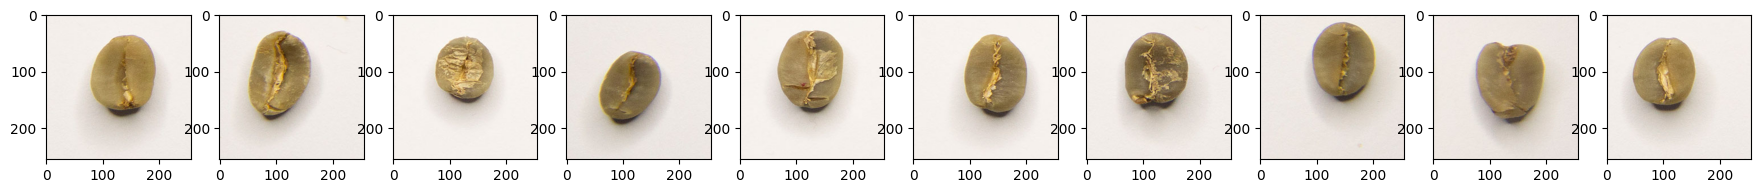


 Sampel Gambar Biji Kopi Berkualitas Buruk/Defect:



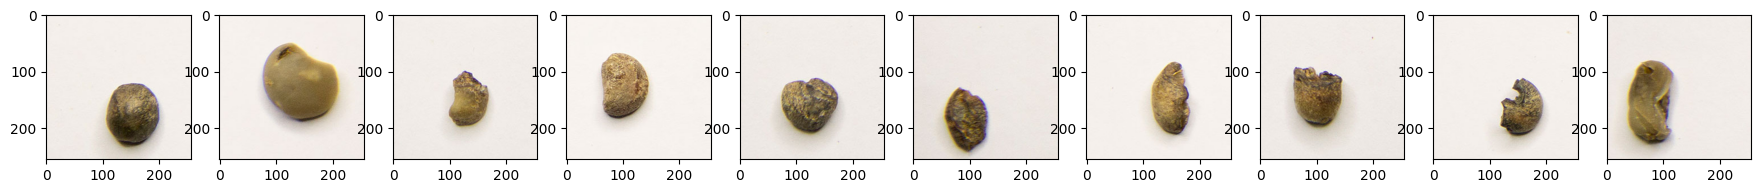

In [ ]:
import matplotlib.image as mpimg

print('\n Sampel Gambar Biji Kopi Berkualitas Baik:\n')
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(good_quality_bean_imgs[:10]):
  sp = plt.subplot(1, 10, i+1)
  img = mpimg.imread(os.path.join(good_quality_bean_train, img_path))
  plt.imshow(img)
plt.show()

print('\n Sampel Gambar Biji Kopi Berkualitas Buruk/Defect:\n')
plt.figure(figsize=(22, 5))
for i, img_path in enumerate(defect_quality_bean_imgs[:10]):
  sp = plt.subplot(1, 10, i+1)
  img = mpimg.imread(os.path.join(defect_quality_bean_train, img_path))
  plt.imshow(img)
plt.show()

# **Train and Build Model**

In [ ]:
# Membuat variabel untuk banyak epoch
num_epochs = 25

# variabel untuk jumlah kelas percobaan
num_classes = 2

## Import model package yang dibutuhkan

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## Modelling Step (Freeze some layers on pretrained model)

In [ ]:
# Menginisiasi pretrained model MobileNetV2 tanpa lapisan fully connected
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Mengunci lapisan-lapisan di pretrained model agar tidak dilatih semua
for layer in base_model.layers:
    layer.trainable = False

# Menambahkan lapisan global average pooling di atas layer asli pretrained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
# Menambahkan lapisan fully connected dengan 1024 unit
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)

# Menambahkan lapisan output dengan jumlah kelas/num_classes
predictions = Dense(num_classes, activation='softmax')(x)

# Menggabungkan pretrained model dengan lapisan tambahan menjadi model akhir
model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
# Mengompilasi model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

## Fine-Tuning Process

In [ ]:
# Melakukan fine-tuning pada beberapa lapisan teratas agar menyesuaikan dengan dataset
for layer in model.layers[-20:]:
    layer.trainable = True

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

## Training Process

In [ ]:
# train model
history = model.fit(train_generator,
                    epochs = num_epochs,
                    validation_data = val_generator,
                    )

Epoch 1/25
150/150 [==============================] - 1859s 12s/step - loss: 0.5635 - accuracy: 0.7242 - val_loss: 0.3030 - val_accuracy: 0.8850
Epoch 2/25
150/150 [==============================] - 158s 1s/step - loss: 0.4513 - accuracy: 0.7817 - val_loss: 0.2797 - val_accuracy: 0.9062
Epoch 3/25
150/150 [==============================] - 147s 977ms/step - loss: 0.4171 - accuracy: 0.8108 - val_loss: 0.2597 - val_accuracy: 0.9025
Epoch 4/25
150/150 [==============================] - 158s 1s/step - loss: 0.3775 - accuracy: 0.8283 - val_loss: 0.2543 - val_accuracy: 0.8988
Epoch 5/25
150/150 [==============================] - 159s 1s/step - loss: 0.3684 - accuracy: 0.8388 - val_loss: 0.2555 - val_accuracy: 0.9013
Epoch 6/25
150/150 [==============================] - 158s 1s/step - loss: 0.3518 - accuracy: 0.8462 - val_loss: 0.2591 - val_accuracy: 0.9013
Epoch 7/25
150/150 [==============================] - 157s 1s/step - loss: 0.3331 - accuracy: 0.8517 - val_loss: 0.2681 - val_accuracy: 0

## Training Result Visualization (Plot)

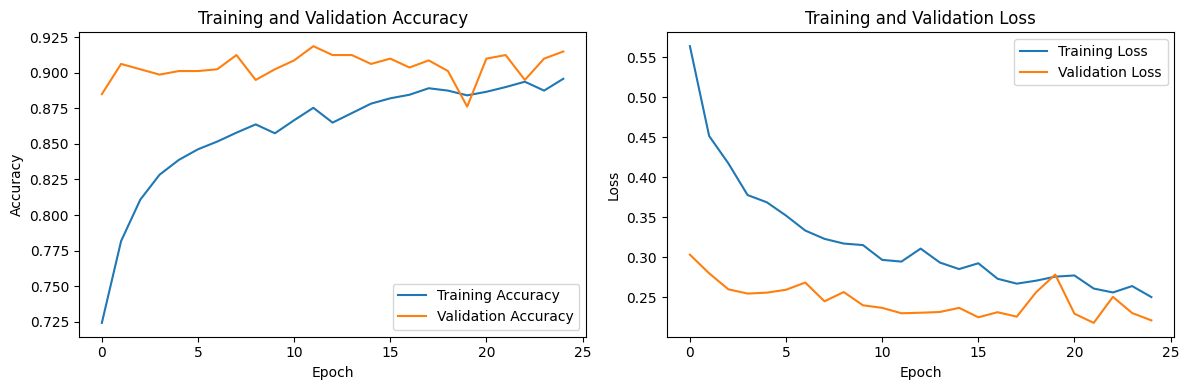

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model Evaluation

In [ ]:
# EVALUASI PERFORMA TRAINING
score = model.evaluate(train_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

150/150 [==============================] - 116s 769ms/step - loss: 0.2230 - accuracy: 0.9112
Loss: 0.2230
Accuracy: 0.9112


In [ ]:
# EVALUASI PERFORMA VALIDASI
score = model.evaluate(val_generator)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

50/50 [==============================] - 38s 759ms/step - loss: 0.2208 - accuracy: 0.9150
Loss: 0.2208
Accuracy: 0.9150


In [ ]:
# EVALUASI PERFORMA TESTING
test_loss, test_accuracy = model.evaluate(test_generator)

50/50 [==============================] - 32s 608ms/step - loss: 0.2208 - accuracy: 0.9150


##Saved_Model on Runtime (h5 format)

In [ ]:
model.save('model.h5')

## Prediction/Testing

In [ ]:
from tensorflow.keras.models import load_model
model_path = 'model.h5'
model = load_model(model_path)

Saving green (83).png to green (83).png


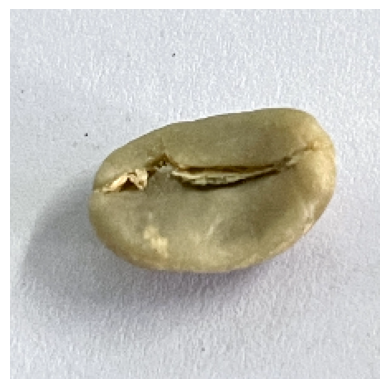

1/1 [==============================] - 0s 57ms/step
QUALITY : GOOD


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  img = mpimg.imread(fn)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  # Mengubah gambar menjadi format yang dapat diprediksi oleh model
  img = image.load_img(fn, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0  # Melakukan normalisasi gambar

  # Melakukan prediksi menggunakan model
  prediction = model.predict(x)
  if prediction[0][0] > 0.8:
    print('QUALITY : DEFECT')
  elif prediction[0][1] > 0.8:
    print('QUALITY : GOOD')
  else:
    print('Unknown')

# **Prepare Deploy:** Convert & Export Model

### Export model ke beberapa format output, run cell pada output format yang diinginkan (sesuai kebutuhan deploy model)

## Save model to h5 format

In [ ]:
# Path ke direktori di Google Drive
drive_path = '/content/drive/MyDrive/dataset-arabika/Deteksi-Kopi'

# Buat direktori untuk menyimpan model jika belum ada
models_dir = os.path.join(drive_path, 'model_kualitas')
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

In [ ]:
#Simpan model baru dengan nama baru
model.save(os.path.join(models_dir, 'Model_QualityDetect_MobilenetV2_3.h5'))

In [ ]:
#Cek apakah model berhasil tersimpan di drive
saved_model_path = os.path.join(models_dir, 'Model_QualityDetect_MobilenetV2_3.h5')
if os.path.exists(saved_model_path):
    print('Model berhasil disimpan di Google Drive.')
else:
    print('Model gagal disimpan di Google Drive.')

Model berhasil disimpan di Google Drive.


## Save model to .pb format

In [ ]:
# Tentukan path ke model SavedModel
saved_model_path = '/content/drive/MyDrive/dataset-arabika/Deteksi-Kopi/model_kualitas/pb/'

# Inisialisasi TensorFlow Lite Converter
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)

# Set pengaturan yang diperlukan, jika ada
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]

# Konversi model ke format .pb
tflite_model = converter.convert()

# Simpan model ke file .pb
output_pb_path = '/content/drive/MyDrive/dataset-arabika/Deteksi-Kopi/model_kualitas/OutputModel_QualityDetect_MobilenetV2_3.pb'
with tf.io.gfile.GFile(output_pb_path, 'wb') as f:
    f.write(tflite_model)

print("Model berhasil dikonversi ke format .pb.")

Model berhasil dikonversi ke format .pb.


## Save model to TFJS

In [ ]:
#!pip install tensorflowjs

In [ ]:
import tensorflowjs as tfjs

# Simpan model ke format tfjs
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/dataset-arabika/Deteksi-Kopi/model_kualitas')

## Save model to TFLite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = '/content/drive/MyDrive/dataset-arabika/Deteksi-Kopi/model_kualitas/model_v1.tflite'
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)